In [1]:
%load_ext cypher
import networkx as nx
from IPython.display import display
import pylab
import ipywidgets as widgets
import seaborn as sns
from ipywidgets import interact
# from scripts.vis import draw
from py2neo import Node
import neo4jupyter
neo4jupyter.init_notebook_mode()
import py2neo
from py2neo import Graph
import os
import numpy as np
import glob
from os import listdir
from neo4j.v1 import GraphDatabase
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>

In [2]:
def refreshGraph():
    plt.clf()
    nx.draw_networkx_nodes(T, pos, nodelist=black, node_color='k', node_size=400, alpha=0.8)
    nx.draw_networkx_nodes(T, pos, nodelist=white, node_color='w', node_size=400, alpha=0.8)
    nx.draw_networkx_edges(T,pos,width=1.0, alpha=0.5)
    plt.axis('off')
    plt.axis((-4,4,-1,3))
    fig.patch.set_facecolor('white')
    plt.show()

def onClick(event):
    (x,y)   = (event.xdata, event.ydata)

    for i in allNodes:            
        node = pos[i]
        distance = pow(x-node[0],2)+pow(y-node[1],2)
        if distance < 0.1:
            T.remove_node(i)
            if i in black: black.remove(i)
            if i in white: white.remove(i)
            allNodes.remove(i)
            refreshGraph()

<IPython.core.display.Javascript object>


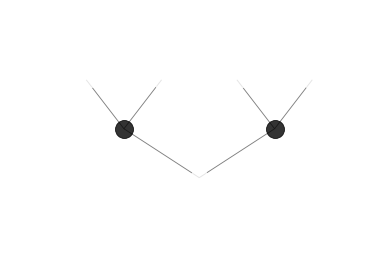

In [10]:
# %matplotlib inline
fig, ax = plt.subplots()
fig.canvas.mpl_connect('button_press_event', onClick)

T = nx.Graph()

### Nodes
white, black = [1, 4, 5, 6, 7], [2, 3]
allNodes = white+black

for node in allNodes:      
    T.add_node(node)
    ### Edges
    T.add_edge(1, 2)
    T.add_edge(1, 3)
    T.add_edge(2, 4)
    T.add_edge(2, 5)
    T.add_edge(3, 6)
    T.add_edge(3, 7)

    ### Positions of the nodes
    pos={}
    pos[1]=np.array([ 0,0])
    pos[2]=np.array([-2,1])
    pos[3]=np.array([ 2,1])
    pos[4]=np.array([-3,2])
    pos[5]=np.array([-1,2])
    pos[6]=np.array([ 1,2])
    pos[7]=np.array([ 3,2])

### Draw nodes and edges
refreshGraph()

<IPython.core.display.Javascript object>


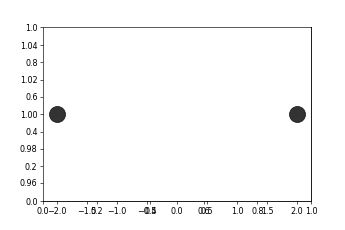

In [21]:

# Simple mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    print ('x = %d, y = %d'%(ix, iy))

    # assign global variable to access outside of function
    global coords_what
    coords_what.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords_what) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return


T = nx.Graph()

### Nodes
white, black = [1, 4, 5, 6, 7], [2, 3]
allNodes = white+black

for node in allNodes:      
    T.add_node(node)
    ### Edges
    T.add_edge(1, 2)
    T.add_edge(1, 3)
    T.add_edge(2, 4)
    T.add_edge(2, 5)
    T.add_edge(3, 6)
    T.add_edge(3, 7)

    ### Positions of the nodes
    pos={}
    pos[1]=np.array([ 0,0])
    pos[2]=np.array([-2,1])
    pos[3]=np.array([ 2,1])
    pos[4]=np.array([-3,2])
    pos[5]=np.array([-1,2])
    pos[6]=np.array([ 1,2])
    pos[7]=np.array([ 3,2])

# x = np.arange(-10,10)
# y = x**2


fig, ax = plt.subplots()

fig = plt.figure(1)
ax = fig.add_subplot(111)

nx.draw_networkx_nodes(T, pos, nodelist=black, node_color='k', node_size=400, alpha=0.8)
# nx.draw_networkx_nodes(T, pos, nodelist=white, node_color='w', node_size=400, alpha=0.8)
# nx.draw_networkx_edges(T,pos,width=1.0, alpha=0.5)


# fig = plt.figure(1)
# ax = fig.add_subplot(111)
# ax.plot(x,y)

coords_what = []

# Call click func
# cid = fig.canvas.mpl_connect('button_press_event', onClick)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


In [22]:
coords_what

[(0.95990143369175607, 0.49338321245362504),
 (0.04293608124253287, 0.49338321245362504)]

<IPython.core.display.Javascript object>


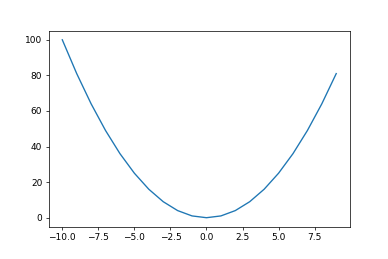

In [9]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# Simple mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    print ('x = %d, y = %d'%(ix, iy))

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return


x = np.arange(-10,10)
y = x**2

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(x,y)

coords = []

# Call click func
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


# # limits for integration
# ch1 = np.where(x == (find_nearest(x, coords[0][0])))
# ch2 = np.where(x == (find_nearest(x, coords[1][0])))

# # Calculate integral
# y_int = trapz(y[ch1[0][0]:ch2[0][0]], x = x[ch1[0][0]:ch2[0][0]])

# print('')
# print('Integral between '+str(coords[0][0])+ ' & ' +str(coords[1][0]))
# print(y_int)